# Load packages and define useful functions

In [1]:
# Loading the required packages to run this notebook
import src.utils.utils as utils
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import seaborn as sns
from pathlib import Path

# Use seaborn style defaults and set the default figure size
fig_size = (12, 8)
sns.set(rc={"figure.figsize": fig_size})
sns.set_theme(style="whitegrid")
sns.set_context("paper", rc={"lines.linewidth": 3.0})
style.use("seaborn-colorblind")
sns.set_style("ticks")

# Setup the correct foldure structure
project_dir = Path().resolve().parents[1]
model_dir = project_dir / "models" / "saved-models"
model_intermediate_dir = model_dir / "intermediate"

# Look at the default setup
Use the VRNN model, 100 dimensional latent and recurrent laten space, and no batch normalization, scheduler, or KL annealing. Showing results for cargo and tanker vessels

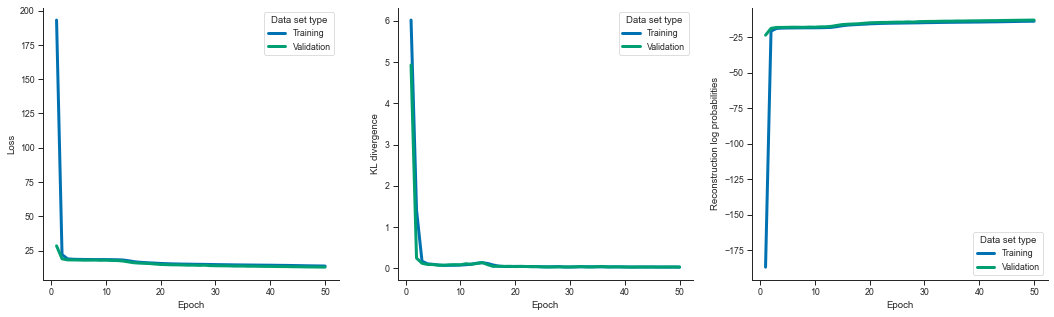

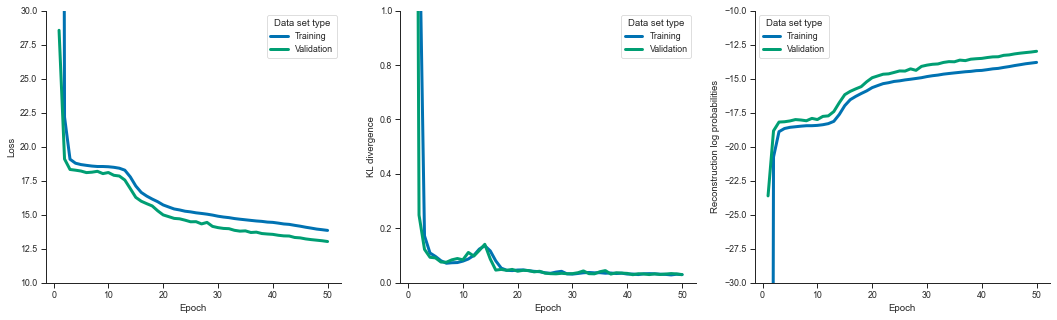

In [60]:
data_processed = "RegionBornholm_01062019_30092019_Fish_14400_86400_600"
df_default = utils.curves_df("Default", data_processed, model_dir)
utils.plot_curves(df_default)
utils.plot_curves(df_default, ylims=[(10, 30), (0, 1), (-30, -10)])

#  Add Scheduler

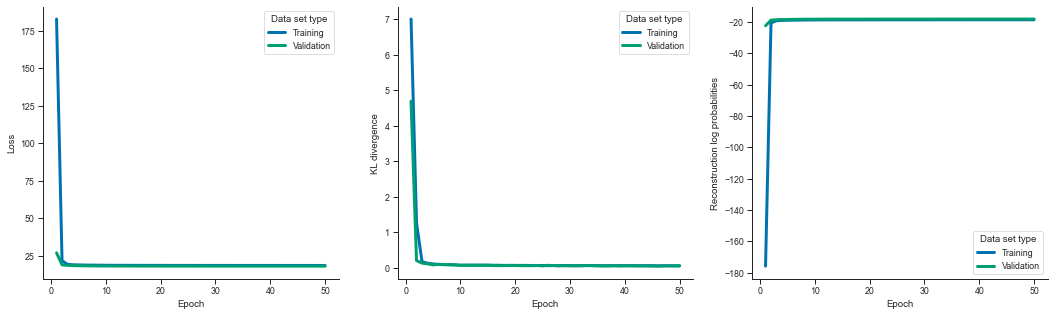

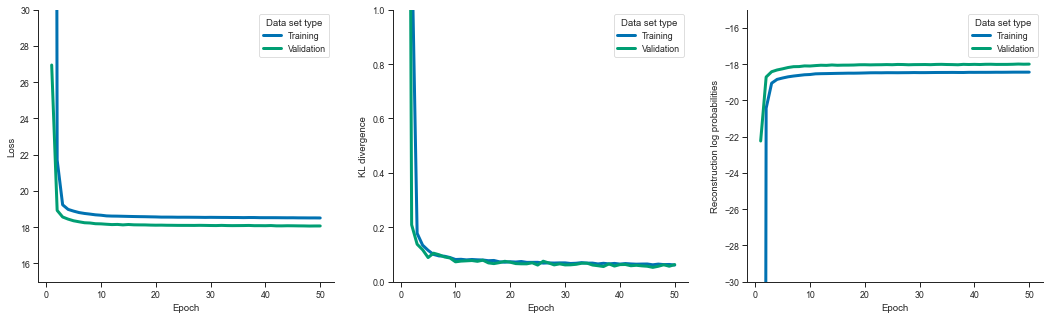

In [59]:
df_scheduler = utils.curves_df("Scheduler", data_processed, model_dir, scheduler=True)
utils.plot_curves(df_scheduler)
utils.plot_curves(df_scheduler, ylims=[(15, 30), (0, 1), (-30, -15)])

#  Annealed Kullback–Leibler 

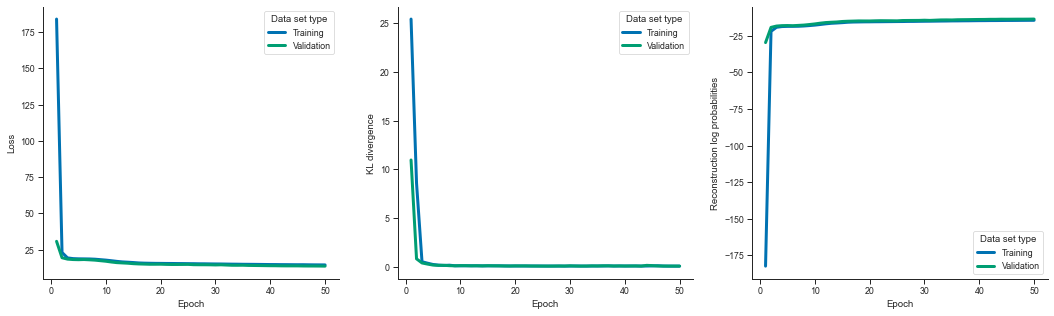

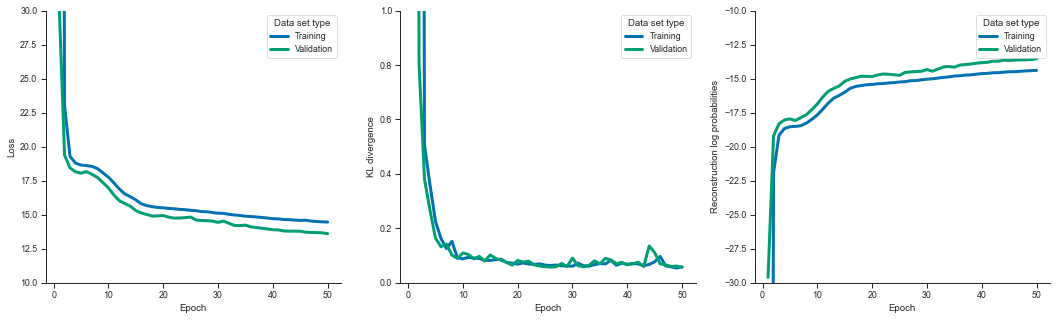

In [58]:
df_annealing = utils.curves_df("Annealing", data_processed, model_dir, kl_annealing=True)
utils.plot_curves(df_annealing)
utils.plot_curves(df_annealing, ylims=[(10, 30), (0, 1), (-30, -10)])

# Scheduler & Annealed Kullback–Leibler 

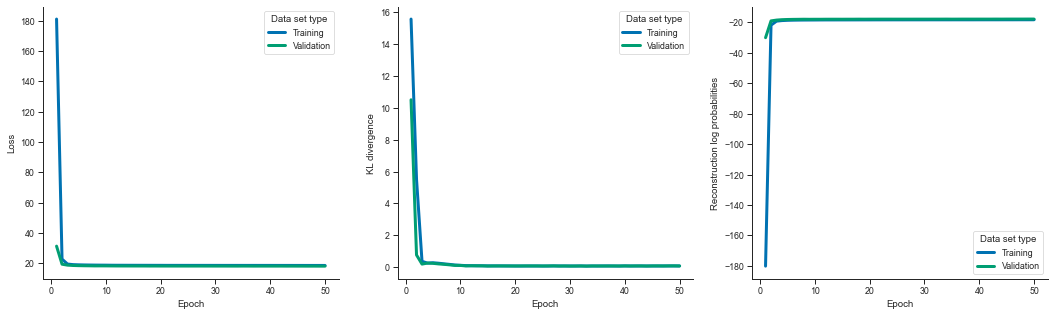

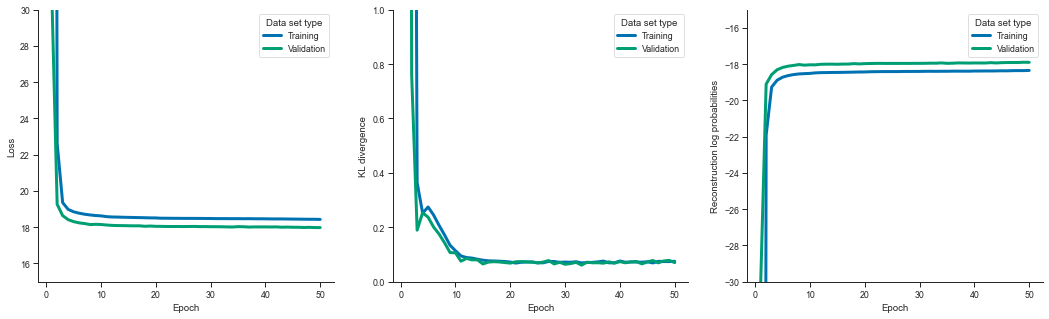

In [57]:
df_scheduler_annealing = utils.curves_df("Scheduler_Annealing", data_processed, model_dir, scheduler=True, kl_annealing=True)
utils.plot_curves(df_scheduler_annealing)
utils.plot_curves(df_scheduler_annealing, ylims=[(15, 30), (0, 1), (-30, -15)])

# Different settings with no batch normalization

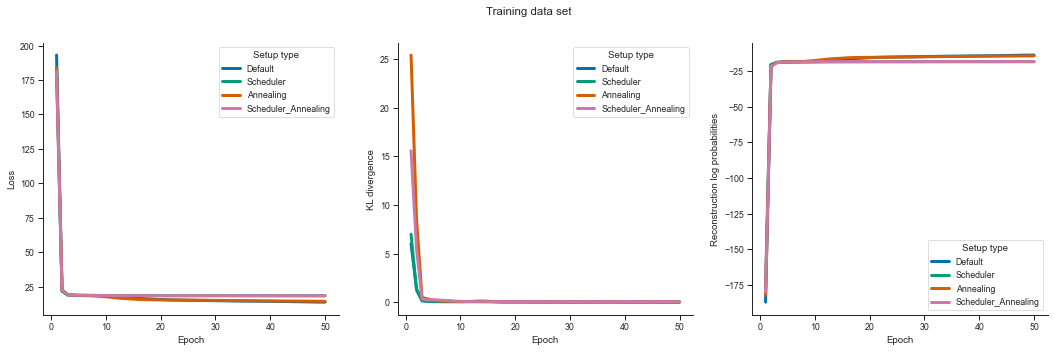

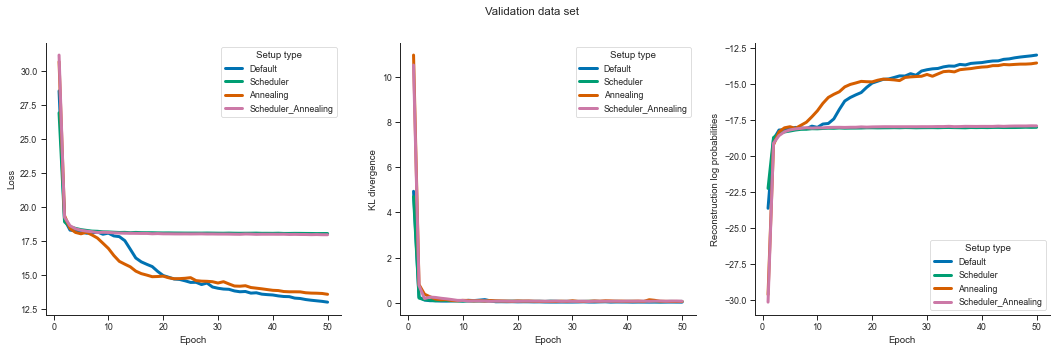

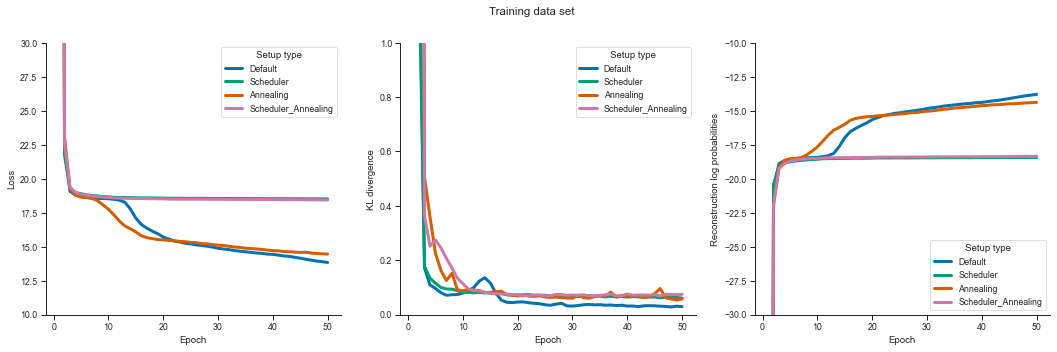

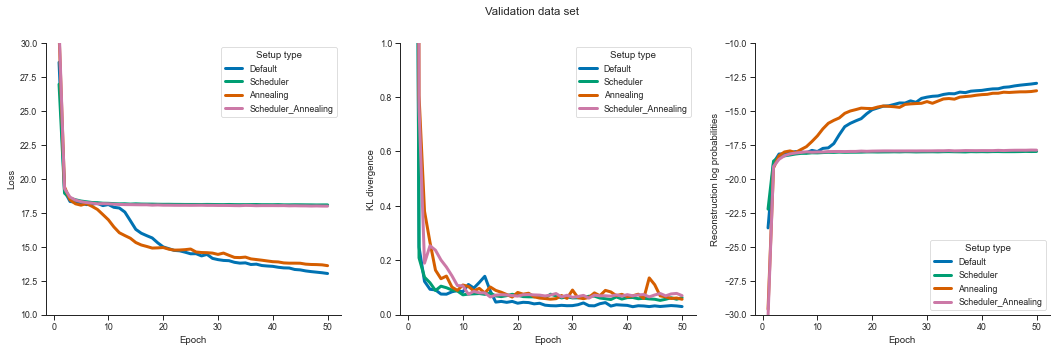

In [56]:
df = pd.concat([df_default, df_scheduler, df_annealing, df_scheduler_annealing])
df.reset_index(drop=True, inplace=True)
hue = "Setup type"
hue_order = ["Default", "Scheduler", "Annealing", "Scheduler_Annealing"]
utils.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set")
utils.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set")
utils.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set",
                  ylims=[(10, 30), (0, 1), (-30, -10)])
utils.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set",
                  ylims=[(10, 30), (0, 1), (-30, -10)])

# Use batch normalization
Use the VRNN model, 100 dimensional latent and recurrent laten space, batch normalization, but no scheduler or KL annealing. Showing results for cargo and tanker vessels

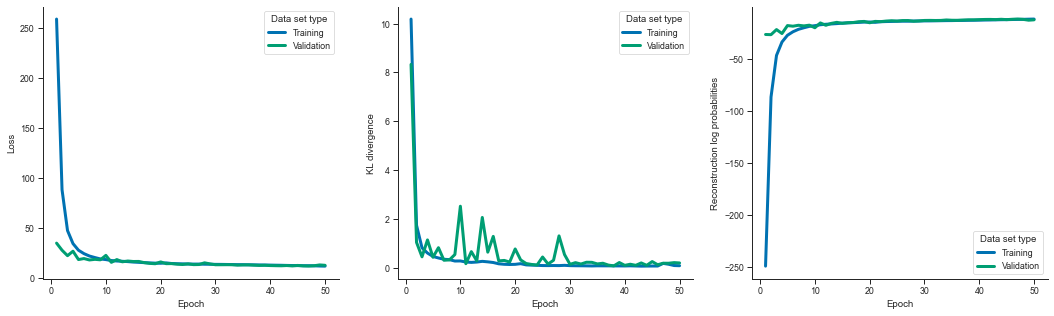

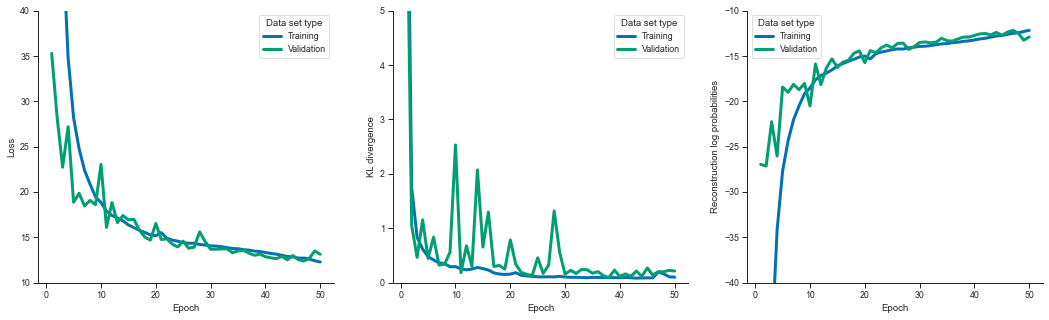

In [55]:
df_batch_norm = utils.curves_df("Batch_Norm", data_processed, model_dir, batch_norm=True)
utils.plot_curves(df_batch_norm)
utils.plot_curves(df_batch_norm, ylims=[(10, 40), (0, 5), (-40, -10)])

# Batch normalization & Scheduler

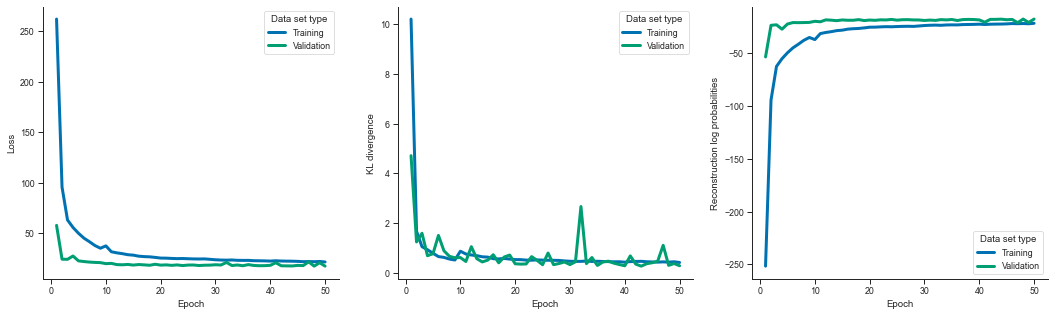

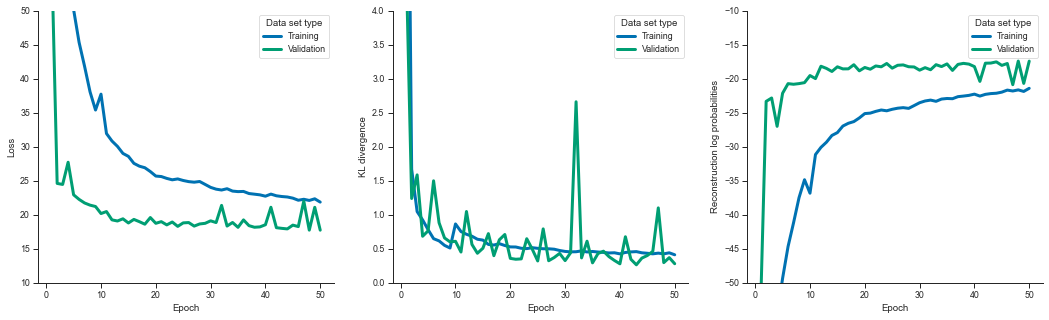

In [53]:
df_batch_norm_scheduler= utils.curves_df("Batch_Norm_Scheduler", data_processed, model_dir, batch_norm=True, scheduler=True)
utils.plot_curves(df_batch_norm_scheduler)
utils.plot_curves(df_batch_norm_scheduler, ylims=[(10, 50), (0, 4), (-50, -10)])

#  Batch normalization & Annealed Kullback–Leibler 

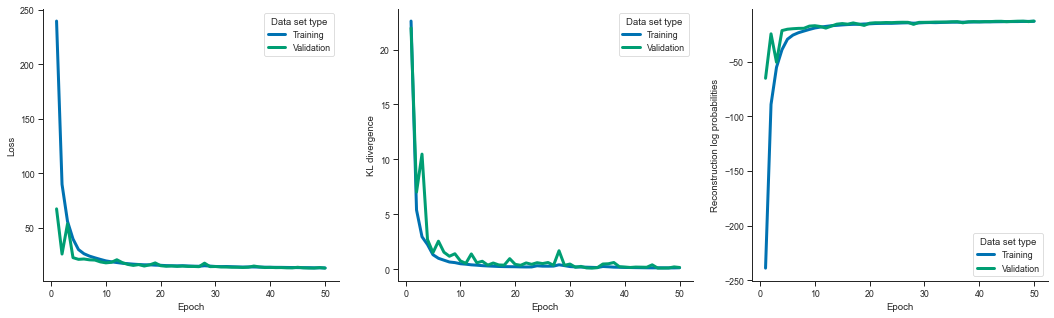

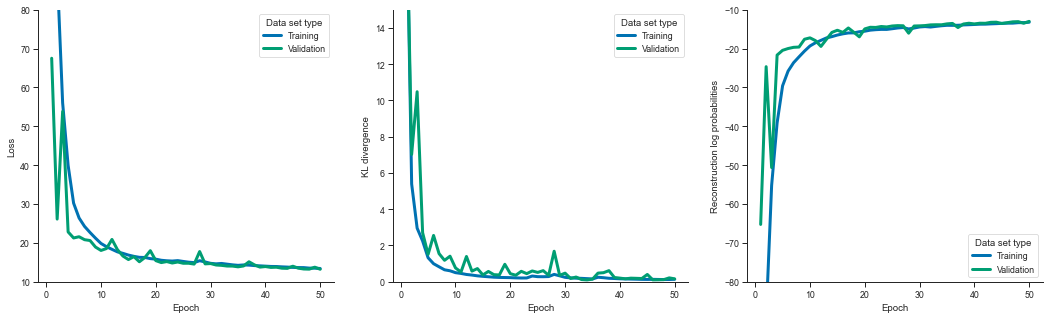

In [39]:
df_batch_norm_annealing = utils.curves_df("Batch_Norm_Annealing", data_processed, model_dir, batch_norm=True, kl_annealing=True)
utils.plot_curves(df_batch_norm_annealing)
utils.plot_curves(df_batch_norm_annealing, ylims=[(10, 80), (0, 15), (-80, -10)])

#  Batch normalization & Annealed Kullback–Leibler & Scheduler

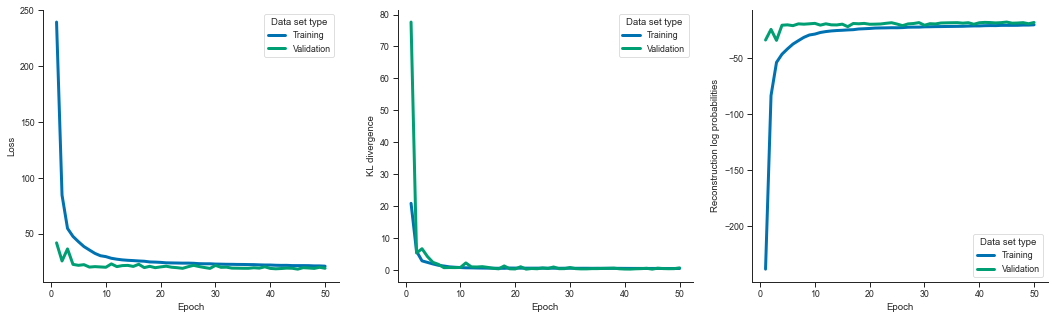

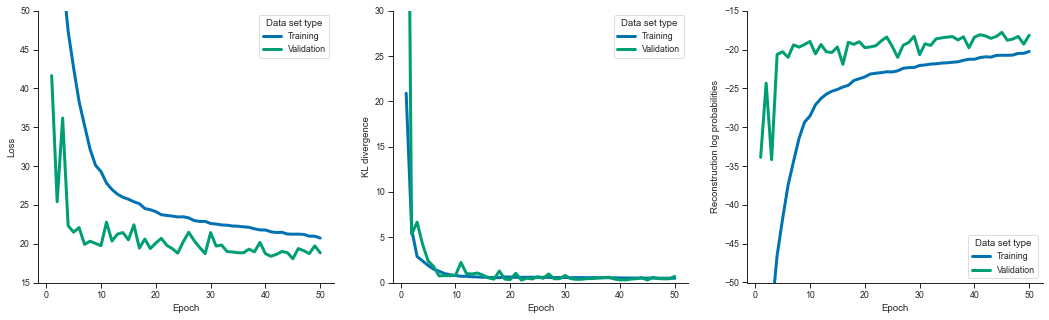

In [52]:
df_batch_norm_scheduler_annealing = utils.curves_df("Batch_Norm_Scheduler_Annealing", data_processed, 
                                                    model_dir, batch_norm=True, scheduler=True, kl_annealing=True)
utils.plot_curves(df_batch_norm_scheduler_annealing)
utils.plot_curves(df_batch_norm_scheduler_annealing, ylims=[(15, 50), (0, 30), (-50, -15)])

# Different settings with batch normalization

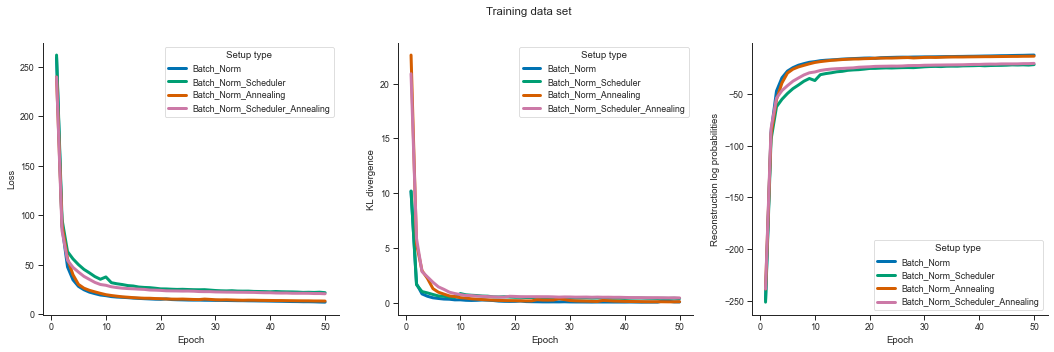

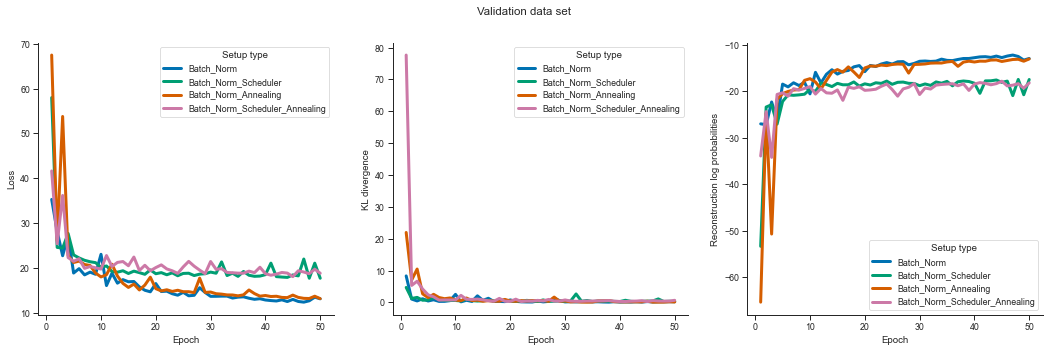

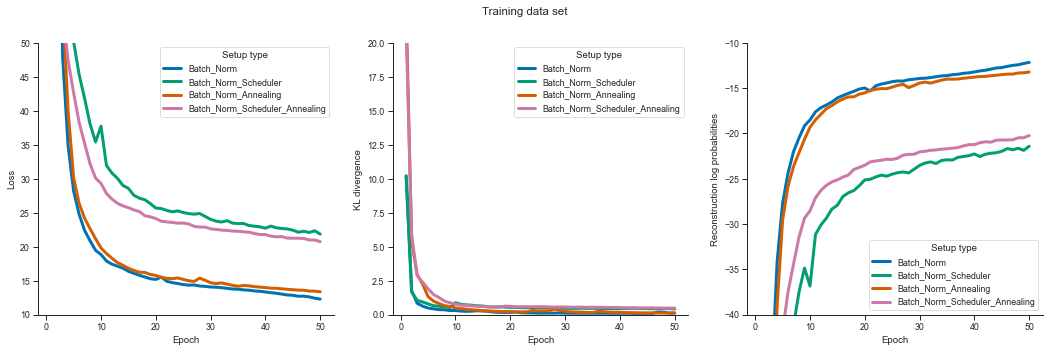

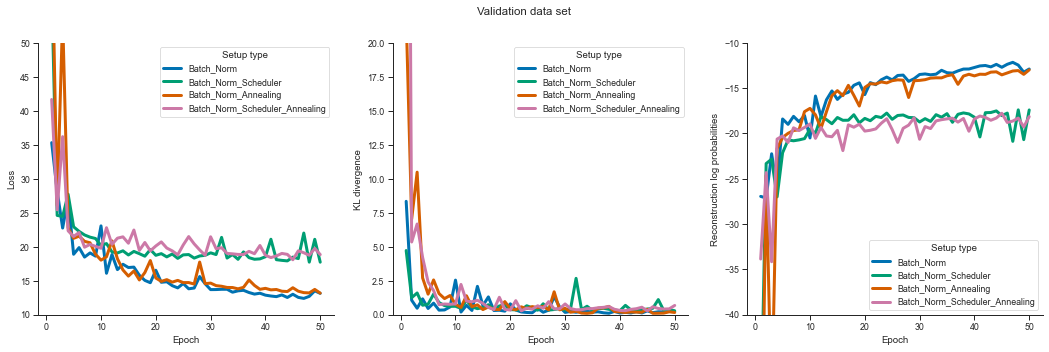

In [50]:
df = pd.concat([df_batch_norm, df_batch_norm_scheduler, df_batch_norm_annealing, df_batch_norm_scheduler_annealing])
df.reset_index(drop=True, inplace=True)
hue_order = ["Batch_Norm", "Batch_Norm_Scheduler", "Batch_Norm_Annealing", "Batch_Norm_Scheduler_Annealing"]
utils.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set")
utils.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set")
utils.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set",
                  ylims=[(10, 50), (0, 20), (-40, -10)])
utils.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set",
                  ylims=[(10, 50), (0, 20), (-40, -10)])

# Best setups (so far)

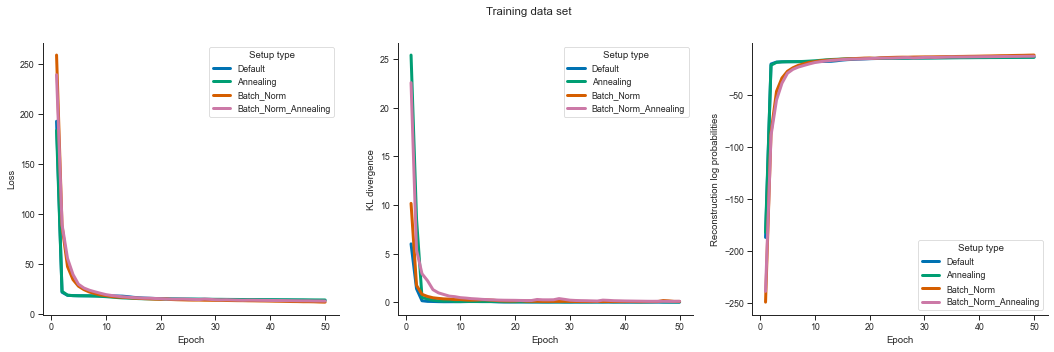

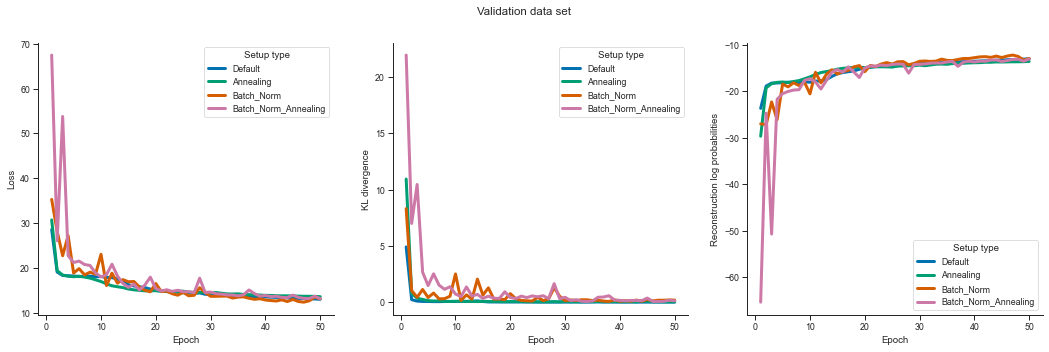

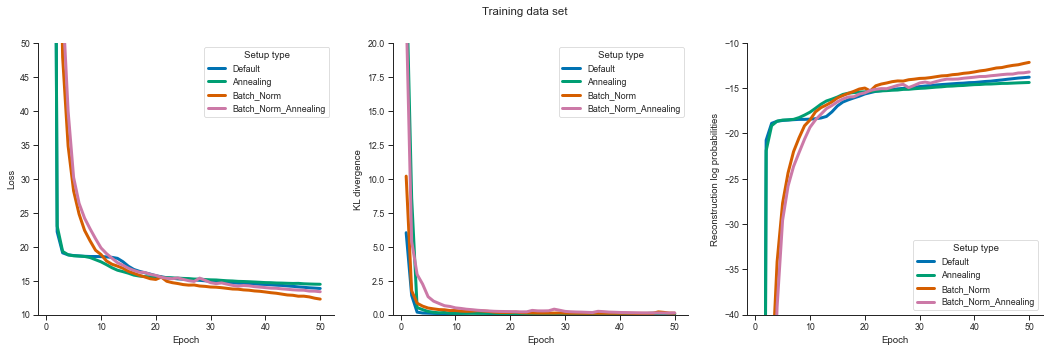

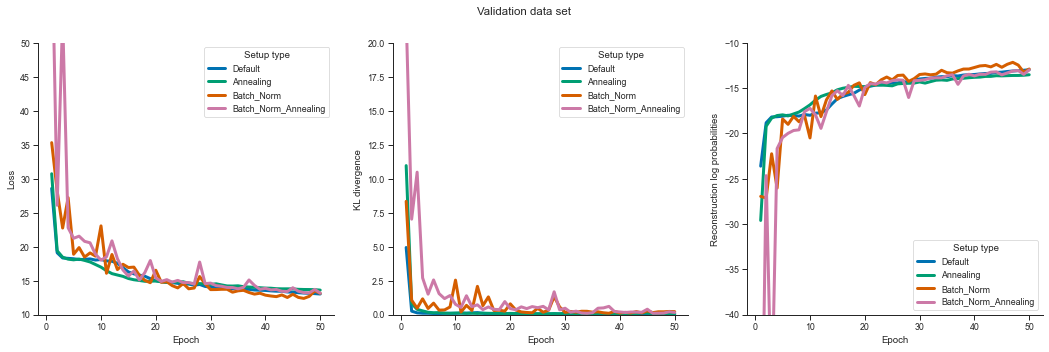

In [51]:
df = pd.concat([df_default, df_annealing, df_batch_norm, df_batch_norm_annealing])
df.reset_index(drop=True, inplace=True)
hue = "Setup type"
hue_order = ["Default", "Annealing", "Batch_Norm", "Batch_Norm_Annealing"]
utils.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set")
utils.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set")
utils.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set",
                  ylims=[(10, 50), (0, 20), (-40, -10)])
utils.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set",
                  ylims=[(10, 50), (0, 20), (-40, -10)])